In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from tempfile import TemporaryFile
# maximum likelihood solution to W
def MLW(x,q):
    v,w = np.linalg.eig(np.cov(x.T))
    idx = np.argsort(np.real(v))[::-1][:q]
    return np.real(w[:,idx])
# posterior distribution of latent variable
def posterior(w, x, mu_x, beta):
    A = np.linalg.inv(w.dot(w.T)+1/beta*np.eye(w.shape[0]))
    mu = w.T.dot(A.dot(x-mu_x))
    varSigma = np.eye(w.shape[1]) - w.T.dot(A.dot(w))
    return mu, varSigma
# Generate a spiral
t = np.linspace(0,3*np.pi,100)
x = np.zeros((t.shape[0],2))
x[:,0] = t*np.sin(t)
x[:,1] = t*np.cos(t)
# pick a random matrix that maps to Y
w = np.random.randn(10,2)
y = x.dot(w.T)
y += np.random.randn(y.shape[0],y.shape[1])
mu_y = np.mean(y,axis=0)
# get maximim likelihood solution of W
w = MLW(y,2)
# compute predictions for latent space
xpred = np.zeros(x.shape)
varSigma = []
for i in range(0, y.shape[0]):
    xpred[i,:], varSigma = posterior(w, y[i,:], mu_y, 1/2)
np.save('05tmp1.npy', xpred)
np.save('05tmp2.npy', varSigma)

[]

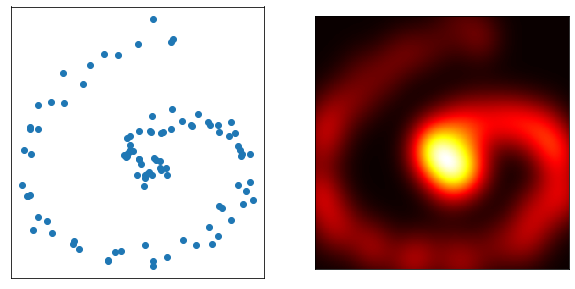

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
xpred = np.load('05tmp1.npy')
varSigma = np.load('05tmp2.npy')
# generate density
N = 300
x1 = np.linspace(np.min(xpred[:,0]), np.max(xpred[:,0]), N)
x2 = np.linspace(np.min(xpred[:,1]), np.max(xpred[:,1]), N)
x1p, x2p = np.meshgrid(x1, x2)
pos = np.vstack((x1p.flatten(), x2p.flatten())).T
# compute posterior
Z = np.zeros((N,N))
for i in range(0, xpred.shape[0]):
    pdf = multivariate_normal(xpred[i,:].flatten(), varSigma)
    Z += pdf.pdf(pos).reshape(N,N)
# plot figuresy
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.scatter(xpred[:,0], xpred[:,1])
ax.set_xticks([])
ax.set_yticks([])
ax = fig.add_subplot(122)
ax.imshow(Z,cmap='hot')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticks([])
ax.set_yticks([])


In [13]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
x0 = 10
def f(x, *args):
# return the value of the objective at x
    return val
def dfx(x,*args):
# return the gradient of the objective at x
    return val
x_star = opt.fmin_cg(f,x0,fprime=dfx, args=args)

NameError: name 'args' is not defined